# Project 9 Exercises

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1

In [2]:
hw_data = pd.read_excel("EFWAndRGDP.xls",index_col = [0,1])

hw_data

ISO_Code_2   World Bank Region  \
ISO_Code_3 Year                                        
AGO        1970-01-01         AO  Sub-Saharan Africa   
           1971-01-01        NaN                 NaN   
           1972-01-01        NaN                 NaN   
           1973-01-01        NaN                 NaN   
           1974-01-01        NaN                 NaN   
...                          ...                 ...   
ZWE        2014-01-01         ZW  Sub-Saharan Africa   
           2015-01-01         ZW  Sub-Saharan Africa   
           2016-01-01         ZW  Sub-Saharan Africa   
           2017-01-01         ZW  Sub-Saharan Africa   
           2018-01-01         ZW  Sub-Saharan Africa   

                      World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                              
AGO        1970-01-01                                                NaN                                                                                     
           1971-01-01                                                NaN                                                                                     
           1972-01-01                                                NaN                                                                                     
           1973-01-01                                                NaN                                                                                     
           1974-01-01                                                NaN                                                                                     
...                                                                  ...                                                                                     
ZWE        2014-01-01                                                  L                                                                                     
           2015-01-01                                                  L                                                                                     
           2016-01-01                                                  L                                                                                     
           2017-01-01                                                  L                                                                                     
           2018-01-01                                                 LM                                                                                     

                      Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                 
AGO        1970-01-01    Angola       NaN                 NaN   
           1971-01-01       NaN       NaN                 NaN   
           1972-01-01       NaN       NaN                 NaN   
           1973-01-01       NaN       NaN                 NaN   
           1974-01-01       NaN       NaN                 NaN   
...                         ...       ...                 ...   
ZWE        2014-01-01  Zimbabwe  5.999147            6.771807   
           2015-01-01  Zimbabwe  6.449595            6.964753   
           2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   

                       Legal System & Property Rights  Sound Money  \
ISO_Code_3 Year                                                      
AGO        1970-01-01                             NaN          NaN   
           1971-01-01                             NaN          NaN   
           1972-01-01                             NaN          NaN   
           1973-01-01                     

In [3]:
oecd_countries = ["Australia", "Austria", "Belgium", "Canada", "Chile", "Colombia", "Costa Rica",
            "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany",
            "Greece", "Hungary", "Iceland", "Ireland", "Israel", "Italy", "Japan", 
            "Latvia", "Lithuania","Luxembourg", "Mexico", "Netherlands", "New Zealand", "Norway",
             "Poland","Portugal", "Slovakia", "Slovenia", "South Korea", "Spain", "Sweden",
             "Switzerland", "Turkey", "United Kingdom", "United States"]
data = hw_data[hw_data["Countries"].isin(oecd_countries)]
data

ISO_Code_2    World Bank Region  \
ISO_Code_3 Year                                         
AUS        1970-01-01         AU  East Asia & Pacific   
           1975-01-01         AU  East Asia & Pacific   
           1980-01-01         AU  East Asia & Pacific   
           1985-01-01         AU  East Asia & Pacific   
           1990-01-01         AU  East Asia & Pacific   
...                          ...                  ...   
USA        2014-01-01         US        North America   
           2015-01-01         US        North America   
           2016-01-01         US        North America   
           2017-01-01         US        North America   
           2018-01-01         US        North America   

                      World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                              
AUS        1970-01-01                                                NaN                                                                                     
           1975-01-01                                                NaN                                                                                     
           1980-01-01                                                NaN                                                                                     
           1985-01-01                                                NaN                                                                                     
           1990-01-01                                                  H                                                                                     
...                                                                  ...                                                                                     
USA        2014-01-01                                                  H                                                                                     
           2015-01-01                                                  H                                                                                     
           2016-01-01                                                  H                                                                                     
           2017-01-01                                                  H                                                                                     
           2018-01-01                                                  H                                                                                     

                           Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                      
AUS        1970-01-01      Australia  7.291154            6.863768   
           1975-01-01      Australia  7.002204            6.255684   
           1980-01-01      Australia  7.316469            6.339449   
           1985-01-01      Australia  7.670016            6.259326   
           1990-01-01      Australia  7.927001            6.708215   
...                              ...       ...                 ...   
USA        2014-01-01  United States  8.249649            7.239681   
           2015-01-01  United States  8.309574            7.237673   
           2016-01-01  United States  8.339536            7.252009   
           2017-01-01  United States  8.379486            7.354358   
           2018-01-01  United States  8.279612            7.409095   

                       Legal System & Property Rights  Sound Money  \
ISO_Code_3 Year                                                      
AUS        1970-01-01                        7.775615     9.581113   
           1975-01-01                        8.034445     8.346907   
           1980-01-01             

In [4]:
del data["ISO_Code_2"]
del data["World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)"]
del data["World Bank Region"]

In [5]:
reg_vars = list(data.keys())
reg_vars

['Countries',
 'Summary',
 'Size of Government',
 'Legal System & Property Rights',
 'Sound Money',
 'Freedom to Trade Internationally',
 'Regulation',
 'RGDP Per Capita']

In [6]:
y_var = [reg_vars[-1]]
x_vars = reg_vars[2:-1]
y_var, x_vars

(['RGDP Per Capita'],
 ['Size of Government',
  'Legal System & Property Rights',
  'Sound Money',
  'Freedom to Trade Internationally',
  'Regulation'])

In [7]:
reg_data = data[reg_vars].dropna()

In [8]:
r_df = reg_data.copy()
r_df["RGDP Per Capita Lag"] = reg_data["RGDP Per Capita"].groupby("ISO_Code_3").shift(5)
r_df = r_df.dropna(axis = 0, how = "any")
x_vars.append("RGDP Per Capita Lag")
y = r_df[y_var]
X = r_df[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
r_df["Predictor"] = results.predict()
results.summary()

/var/folders/f_/_68wnm392hz1gg4qqfgl24z00000gn/T/ipykernel_61418/903672832.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     907.4
Date:                Tue, 25 Apr 2023   Prob (F-statistic):          3.52e-321
Time:                        22:36:42   Log-Likelihood:                -6788.6
No. Observations:                 689   AIC:                         1.359e+04
Df Residuals:                     682   BIC:                         1.362e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                 253.0831    208.679      1.213      0.226    -156.647     662.813
Legal System & Property Rights    3118.5253    264.120     11.807      0.000    2599.939    3637.112
Sound Money                       -167.2658    281.961     -0.593      0.553    -720.881     386.349
Freedom to Trade Internationally  1365.5959    384.745      3.549      0.000     610.168    2121.024
Regulation                       -1152.1395    301.025     -3.827      0.000   -1743.186    -561.093
RGDP Per Capita Lag                  0.8024      0.020     40.456      0.000       0.763       0.841
Constant                         -1.508e+04   3325.701     -4.533      0.000   -2.16e+04   -8545.338
==============================================================================
Omnibus:                      240.808   Durbin-Watson:                   0.243
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              989.743
Skew:                           1.578   Prob(JB):                    1.20e-215
Kurtosis:                       7.951   Cond. No.                     6.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Question 2

<AxesSubplot:ylabel='Frequency'>

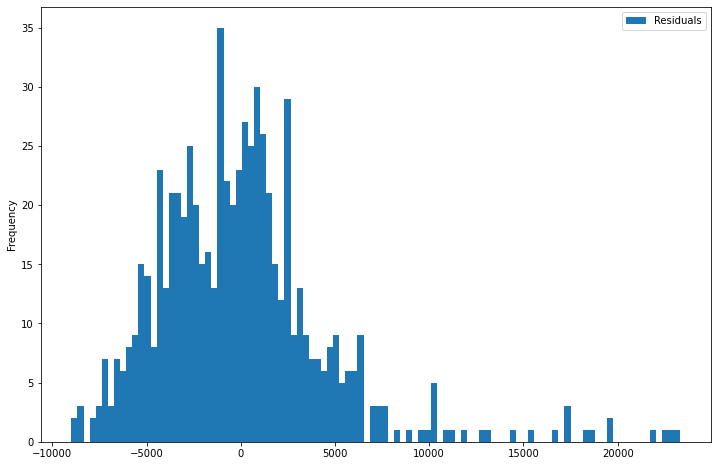

In [9]:
r_df["Residuals"] = results.resid
fig, ax = plt.subplots(figsize = (12,8))

r_df[["Residuals"]].plot.hist(bins = 100, ax = ax)

It seems that there are outliers which is skewing the distribution.

## Question 3

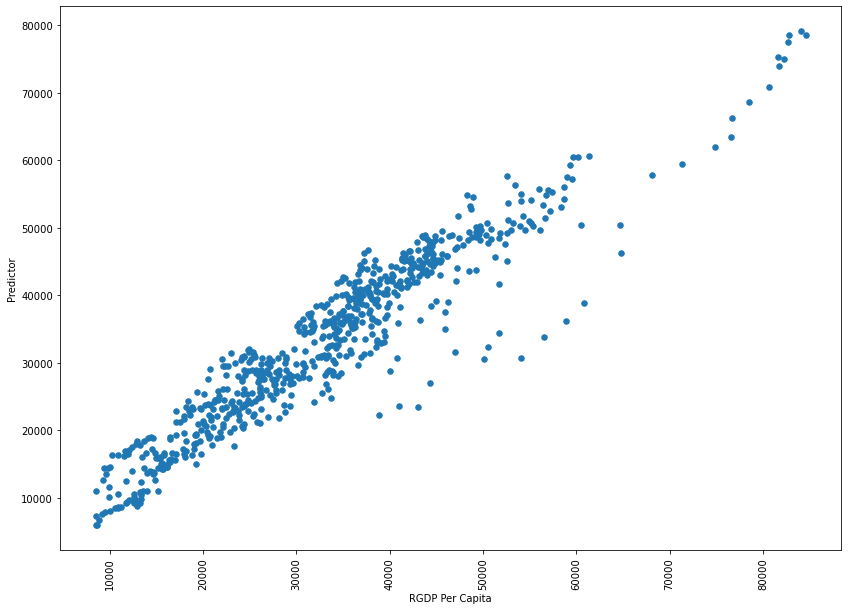

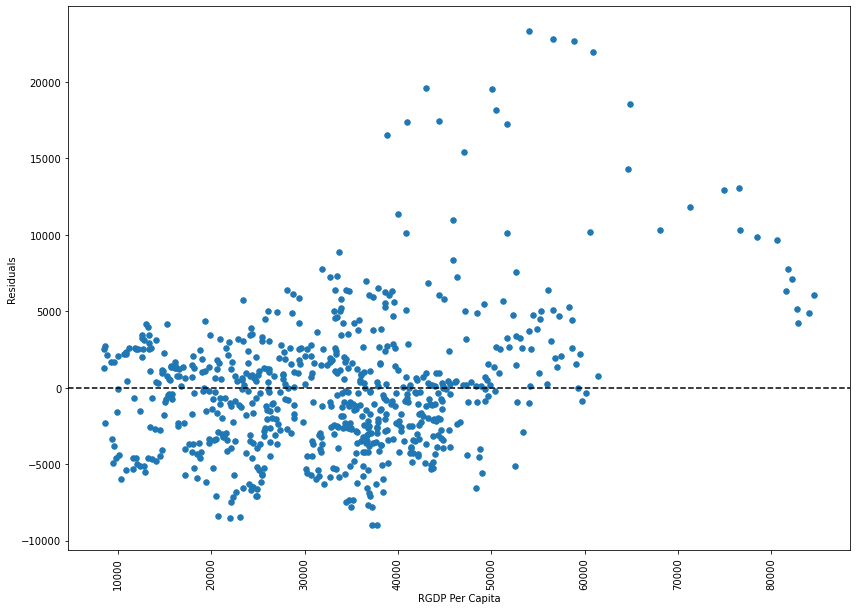

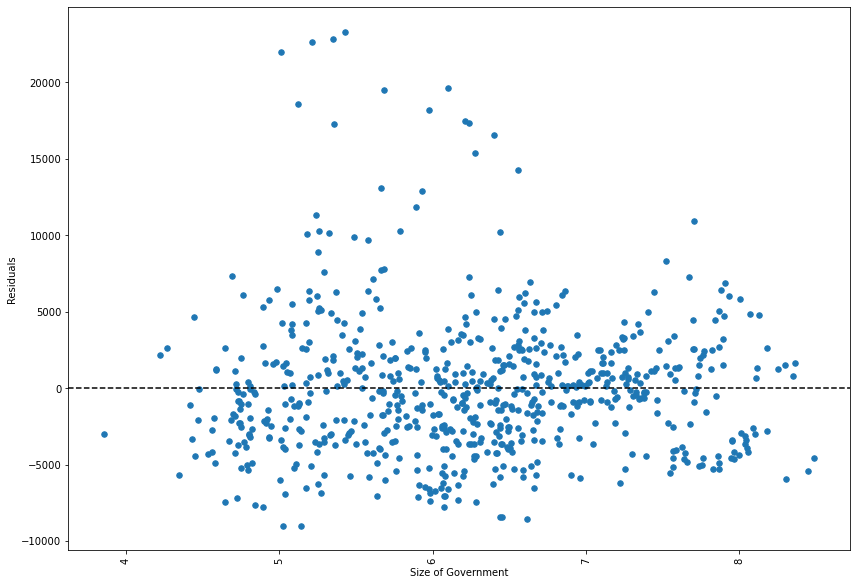

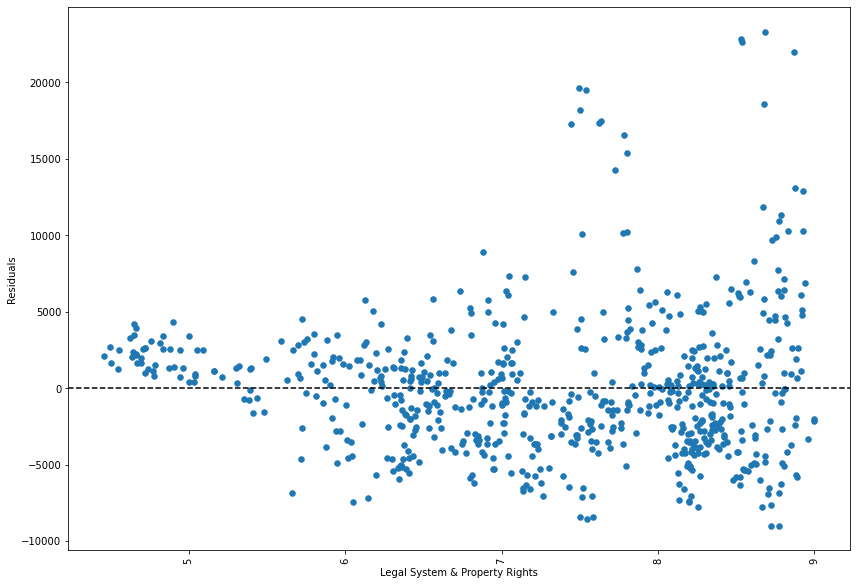

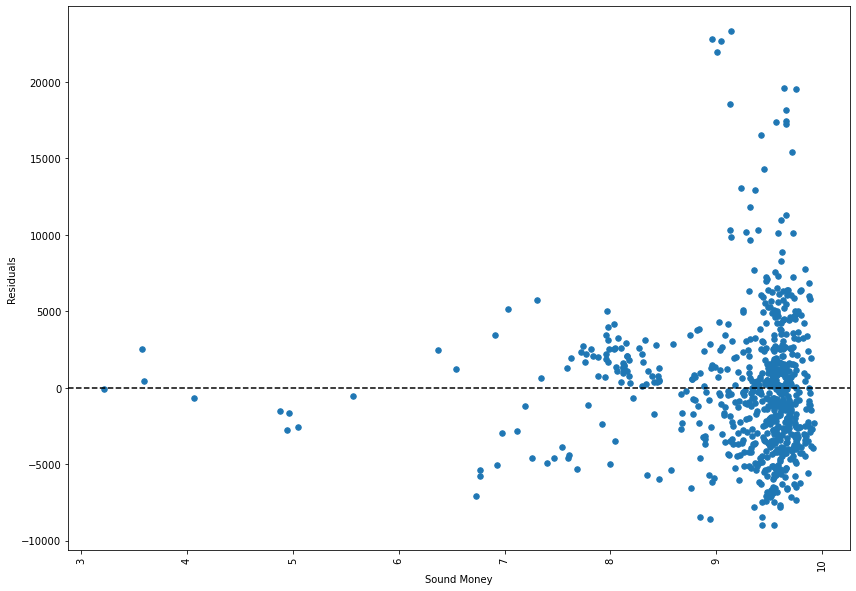

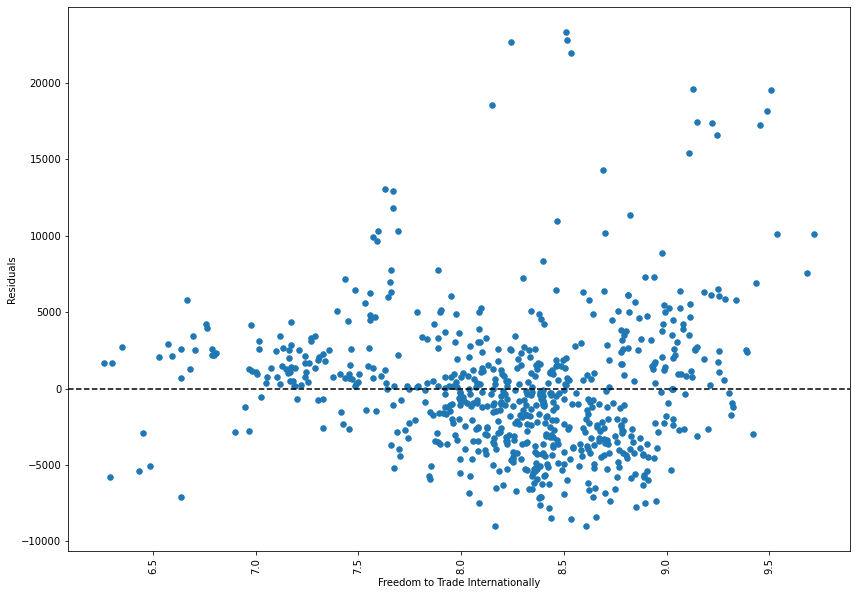

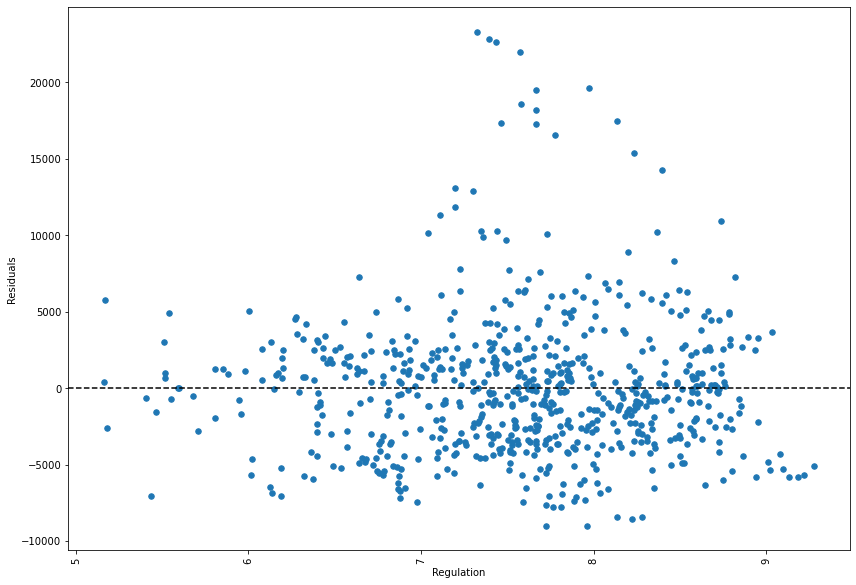

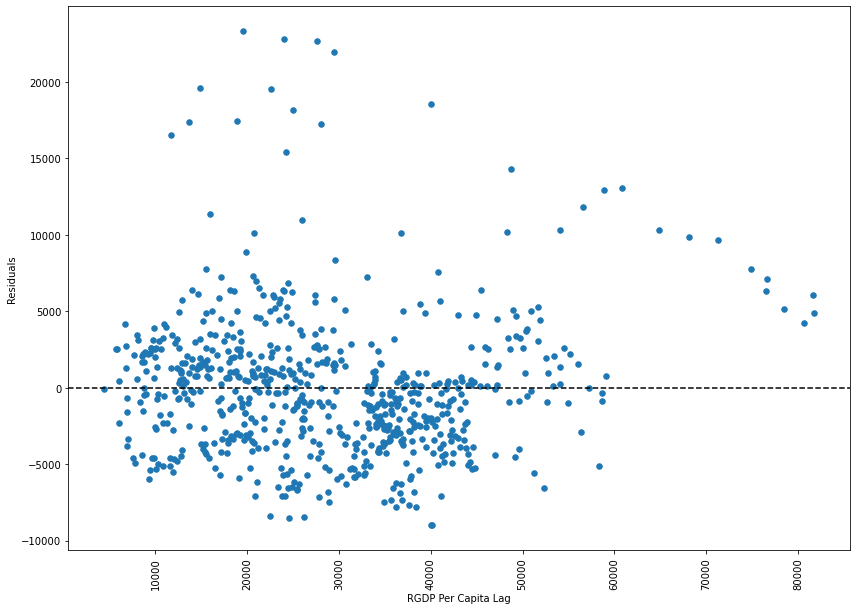

In [10]:
def plot_residuals(df, y_var, x_vars):
    fig, ax = plt.subplots(figsize = (14,10))
    r_df.plot.scatter(x = y_var[0],
                    y = "Predictor",
                    s = 30,
                    ax = ax)

    plt.xticks(rotation = 90)
    plt.show()
    plt.close()

    #cycle through all variables included in regression
    # concatenate y_var and x_vars to form
    for var in y_var + x_vars:
        fig, ax = plt.subplots(figsize = (14,10))
        r_df.plot.scatter(x = var,
                     y = "Residuals",
                     s = 30,
                     ax = ax)
        ax.axhline(0, ls = "--", color = "k")
        plt.xticks(rotation = 90)
        plt.show()
        plt.close()  

plot_residuals(r_df, y_var, x_vars)

I don't believe so. There does not seem to be a consistent pattern between the different scatter plots.

## Question 4

In [11]:
r_df

Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                      
AUS        1995-01-01      Australia  8.140458            6.805072   
           2000-01-01      Australia  8.100603            6.635618   
           2001-01-01      Australia  8.031367            6.563175   
           2002-01-01      Australia  8.100603            6.603237   
           2003-01-01      Australia  8.120384            6.596027   
...                              ...       ...                 ...   
USA        2014-01-01  United States  8.249649            7.239681   
           2015-01-01  United States  8.309574            7.237673   
           2016-01-01  United States  8.339536            7.252009   
           2017-01-01  United States  8.379486            7.354358   
           2018-01-01  United States  8.279612            7.409095   

                       Legal System & Property Rights  Sound Money  \
ISO_Code_3 Year                                                      
AUS        1995-01-01                        8.396893     9.626862   
           2000-01-01                        8.563815     9.472417   
           2001-01-01                        8.526849     9.440917   
           2002-01-01                        8.511514     9.521181   
           2003-01-01                        8.455134     9.582651   
...                                               ...          ...   
USA        2014-01-01                        7.652463     9.737154   
           2015-01-01                        7.745733     9.855788   
           2016-01-01                        7.793107     9.814703   
           2017-01-01                        7.802657     9.772320   
           2018-01-01                        7.646530     9.772494   

                       Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                       
AUS        1995-01-01                          8.036815    7.776343   
           2000-01-01                          7.652405    8.148788   
           2001-01-01                          7.644106    7.939297   
           2002-01-01                          7.556877    8.280821   
           2003-01-01                          7.533910    8.396801   
...                                                 ...         ...   
USA        2014-01-01                          7.836022    8.792114   
           2015-01-01                          7.810632    8.891698   
           2016-01-01                          7.889129    8.952382   
           2017-01-01                          7.921225    9.031901   
           2018-01-01                          7.783384    8.784245   

                       RGDP Per Capita  RGDP Per Capita Lag     Predictor  \
ISO_Code_3 Year                                                             
AUS        1995-01-01       30690.0624           19166.0000  28617.252640   
           2000-01-01       36603.0450           20993.0000  29632.687096   
           2001-01-01       37275.9912           22972.0000  31322.330568   
           2002-01-01       38567.0655           24927.0000  32327.321893   
           2003-01-01       39523.6552           27373.0000  33937.086470   
...                                ...                  ...           ...   
USA        2014-01-01       51664.0000           48452.9335  48442.743667   
           2015-01-01       52591.0000           49266.9159  49216.993794   
           2016-01-01       53015.0000           49675.0000  49739.960185   
           2017-01-01       54007.7698           50394.0000  50331.873558   
           2018-01-01       55334.7394           50863.0000  50332.239657   

                         Residuals  
ISO_Code_3 Year                     
AUS        1995-01-01  2072.809760  
           2000-01-01  6970.357904  
           2001-01-01  5953.660632  
           2002-01-01  6239.743607  
           2003-01-01  5586.568730  
...                 

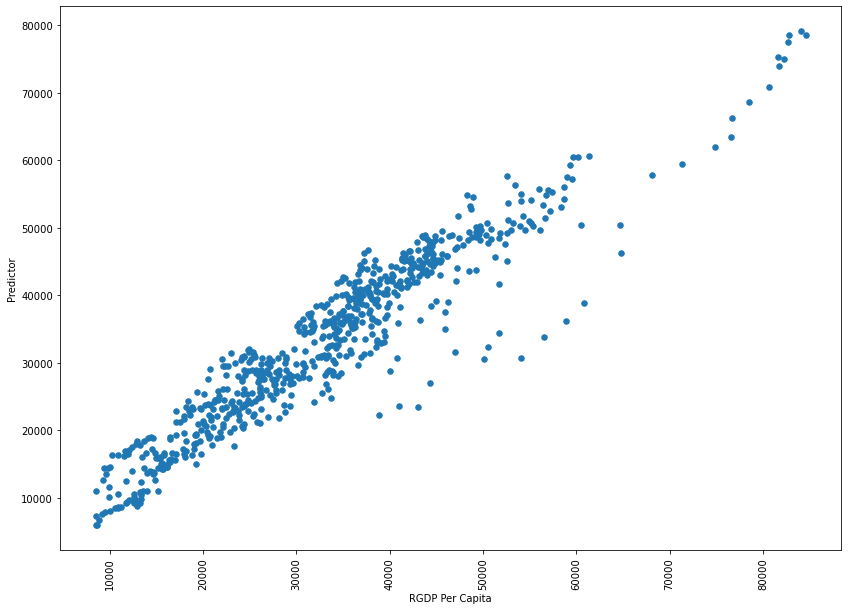

TypeError: can only concatenate list (not "str") to list

In [13]:
x_vars = reg_vars[0]
plot_residuals(r_df, y_var, x_vars)

## Question 1.1

In [15]:
y_var = [reg_vars[-1]]
x_vars = reg_vars[2:-1]
r_df = reg_data.copy()
r_df["RGDP Per Capita Lag"] = reg_data["RGDP Per Capita"].groupby("ISO_Code_3").shift(2)
r_df = r_df.dropna(axis = 0, how = "any")
x_vars.append("RGDP Per Capita Lag")
y = r_df[y_var]
X = r_df[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
r_df["Predictor"] = results.predict()
results.summary()

/var/folders/f_/_68wnm392hz1gg4qqfgl24z00000gn/T/ipykernel_61418/4156766603.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     4210.
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        22:38:18   Log-Likelihood:                -7338.9
No. Observations:                 797   AIC:                         1.469e+04
Df Residuals:                     790   BIC:                         1.472e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                 131.6225     97.499      1.350      0.177     -59.765     323.010
Legal System & Property Rights    1380.2684    117.431     11.754      0.000    1149.754    1610.782
Sound Money                       -193.0486    104.640     -1.845      0.065    -398.454      12.357
Freedom to Trade Internationally   354.5218    135.870      2.609      0.009      87.813     621.230
Regulation                        -598.8297    137.087     -4.368      0.000    -867.928    -329.732
RGDP Per Capita Lag                  0.9276      0.009    101.380      0.000       0.910       0.946
Constant                         -3456.0425   1140.255     -3.031      0.003   -5694.331   -1217.754
==============================================================================
Omnibus:                      407.472   Durbin-Watson:                   0.614
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5526.729
Skew:                           1.976   Prob(JB):                         0.00
Kurtosis:                      15.281   Cond. No.                     4.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Question 2.1

<AxesSubplot:ylabel='Frequency'>

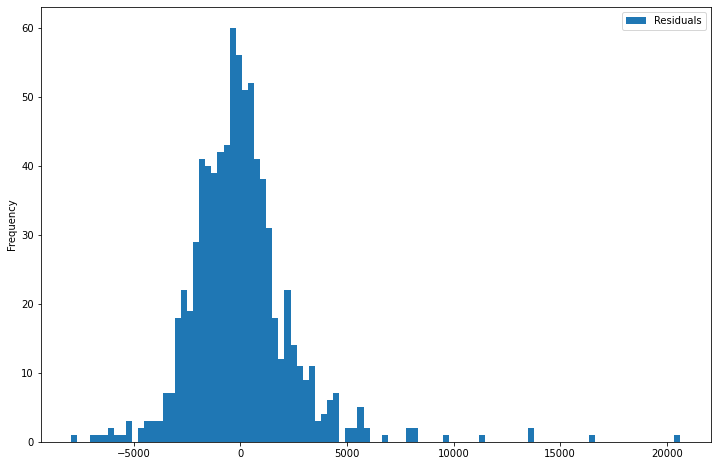

In [16]:
r_df["Residuals"] = results.resid
fig, ax = plt.subplots(figsize = (12,8))

r_df[["Residuals"]].plot.hist(bins = 100, ax = ax)

This looks way better with a 2 year lag rather than a 5 year lag.

## Question 3.1

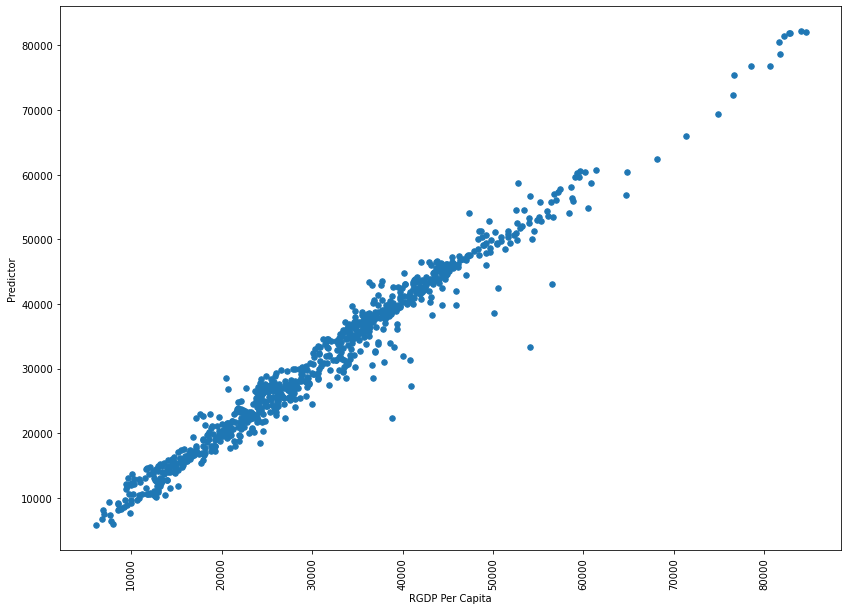

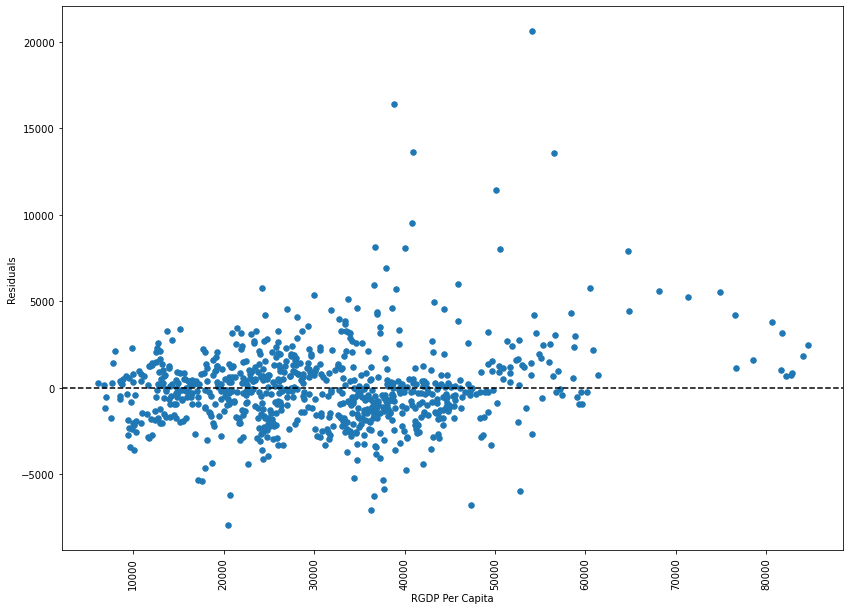

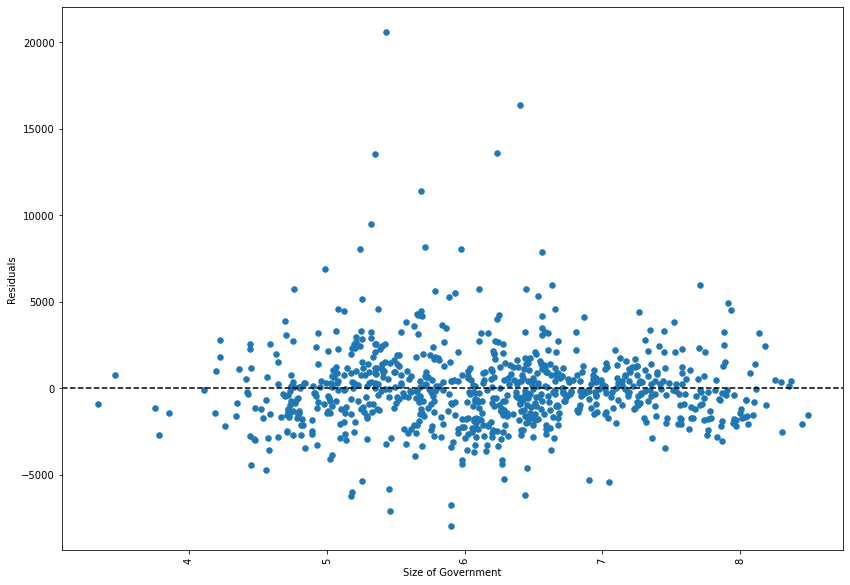

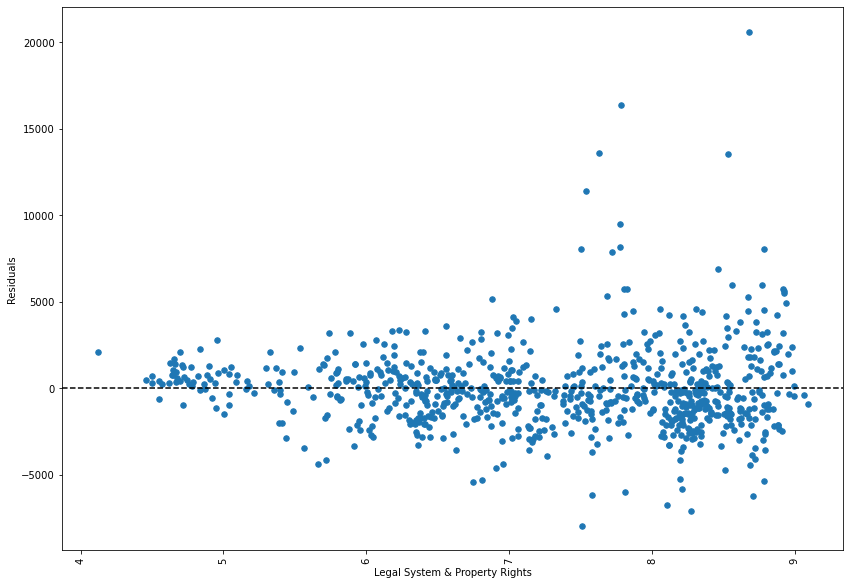

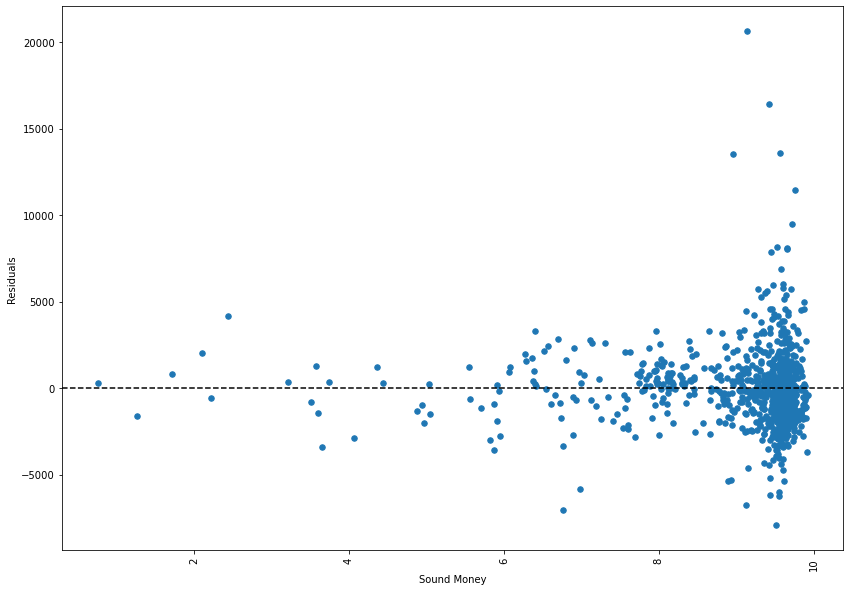

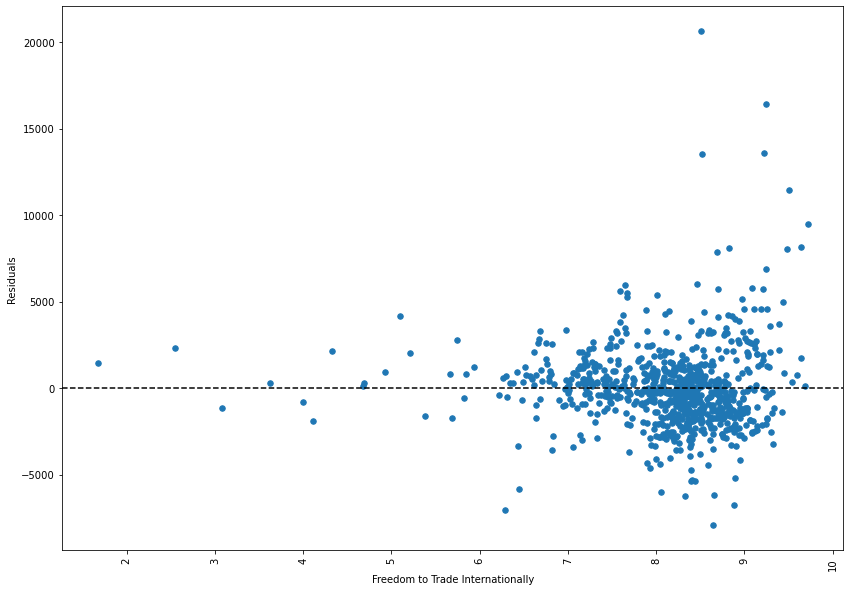

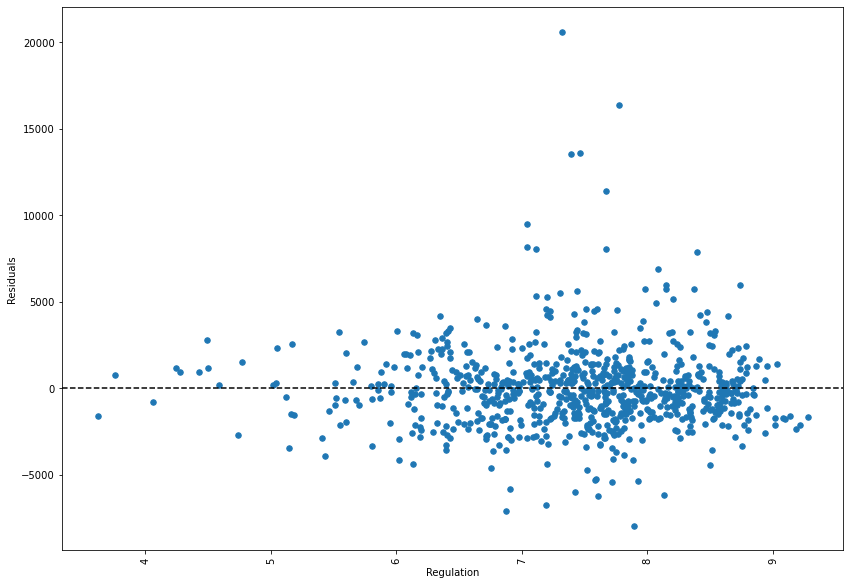

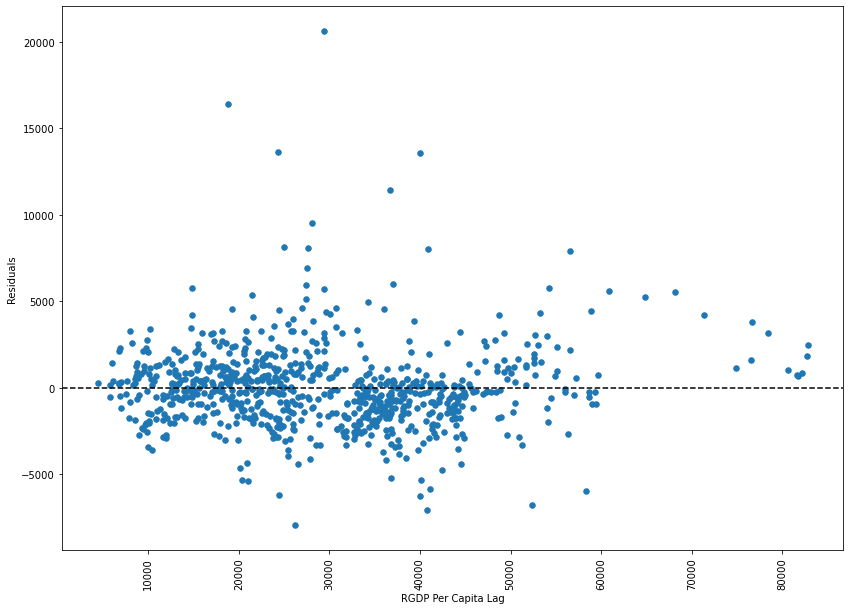

In [17]:
plot_residuals(r_df, y_var, x_vars)

## Question 4.1

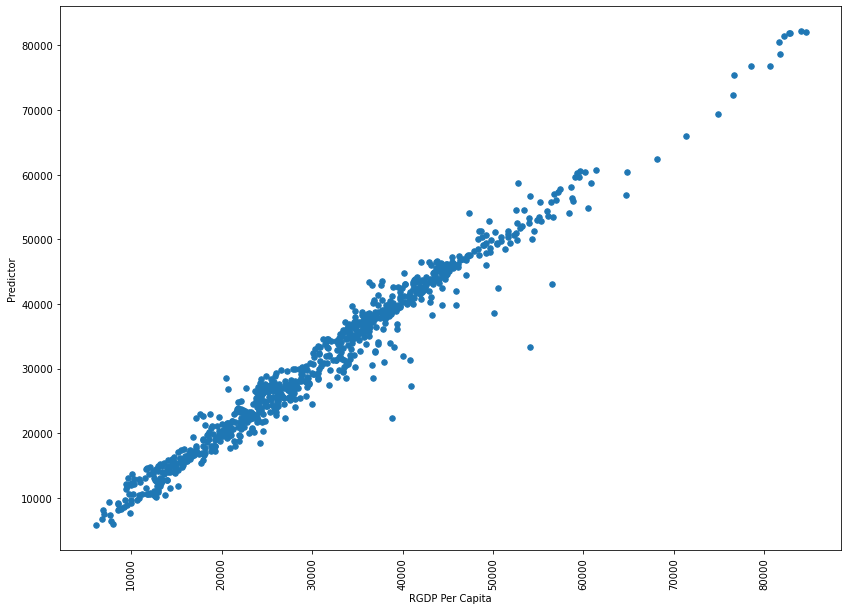

TypeError: can only concatenate list (not "str") to list

In [18]:
x_vars = reg_vars[0]
plot_residuals(r_df, y_var, x_vars)